In [1]:
#Linear Reg, KNN, RF Model
#Cross Validation & MAE
#Grid Search CV for hyperparameter tuning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
X = pd.read_csv("X Data.csv")
numeric_df = pd.read_csv('Numeric Data.csv')

In [3]:
X.head()

,Unnamed: 0,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,DM_Los Angeles,DM_New York City,DM_Rhode Island,DM_Seattle,DM_Hotel room,DM_Private room,DM_Shared room
0,0,-0.343030,0.070068,-0.478757,-0.281507,1.464175,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.847045,-0.449823,-0.722354,-0.198516,0.728599,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,-0.215522,2.117138,0.096401,-0.253843,0.594215,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,-0.173019,-0.287357,-0.620855,-0.253843,0.912493,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,-0.300527,1.710973,-0.086297,-0.309170,-0.296964,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X = X.drop(columns='Unnamed: 0')

In [5]:
X.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,DM_Los Angeles,DM_New York City,DM_Rhode Island,DM_Seattle,DM_Hotel room,DM_Private room,DM_Shared room
0,-0.343030,0.070068,-0.478757,-0.281507,1.464175,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.847045,-0.449823,-0.722354,-0.198516,0.728599,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.215522,2.117138,0.096401,-0.253843,0.594215,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.173019,-0.287357,-0.620855,-0.253843,0.912493,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.300527,1.710973,-0.086297,-0.309170,-0.296964,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
numeric_df.head()

,Unnamed: 0,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,85,2,42,0.45,2,365
1,1,124,30,10,0.09,5,261
2,2,85,5,168,1.30,3,242
3,3,239,6,20,0.24,3,287
4,4,92,3,143,1.03,1,116


In [7]:
numeric_df = numeric_df.drop(columns='Unnamed: 0')

In [8]:
numeric_df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,85,2,42,0.45,2,365
1,124,30,10,0.09,5,261
2,85,5,168,1.30,3,242
3,239,6,20,0.24,3,287
4,92,3,143,1.03,1,116


In [9]:
y = numeric_df['price']
y

0         85
1        124
2         85
3        239
4         92
        ... 
85139    100
85140     79
85141     79
85142    200
85143     35
Name: price, Length: 85144, dtype: int64

In [10]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=47)

In [11]:
X_train.shape, X_test.shape

((59600, 12), (25544, 12))

In [12]:
y_train.shape, y_test.shape

((59600,), (25544,))

In [13]:
X_train.dtypes

minimum_nights                    float64
number_of_reviews                 float64
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
DM_Los Angeles                    float64
DM_New York City                  float64
DM_Rhode Island                   float64
DM_Seattle                        float64
DM_Hotel room                     float64
DM_Private room                   float64
DM_Shared room                    float64
dtype: object

# First Model: Linear Regression

In [14]:
clm = LinearRegression()

In [15]:
clm.fit(X_train, y_train)

LinearRegression()

In [16]:
y_train_pred = clm.predict(X_train)
y_test_pred = clm.predict(X_test)

# Model Assessment

In [17]:
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.014547568360470553, 0.015390596406085977)

In [18]:
mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)

(111.90724901715284, 111.56331007165414)

In [19]:
cv_results = cross_val_score(clm, X_train, y_train, cv = 5)
cv_results

array([0.01439086, 0.01781162, 0.00758168, 0.02336099, 0.01790095])

In [20]:
np.mean(cv_results), np.std(cv_results)

(0.016209219395810347, 0.005183018497957226)

In [21]:
np.round((np.mean(cv_results) - 2 * np.std(cv_results), np.mean(cv_results) + 2 * np.std(cv_results)), 2)

array([0.01, 0.03])

# Hyperparameter tuning with GridSearchCV 

In [22]:
pipe = make_pipeline(SelectKBest(f_regression, k='all'), LinearRegression())

In [23]:
pipe.fit(X_train, y_train)

C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Pipeline(steps=[('selectkbest',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x00000233E5CE0790>)),
                ('linearregression', LinearRegression())])

In [24]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [25]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.014547568360470553, 0.015390596406085977)

In [26]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(111.90724901715284, 111.56331007165414)

In [27]:
cv_results2 = cross_val_score(pipe, X_train, y_train, cv=5)
print(cv_results2)

[0.01439086 0.01781162 0.00758168 0.02336099 0.01790095]


C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [28]:
np.mean(cv_results2), np.std(cv_results2)

(0.016209219395810347, 0.005183018497957226)

In [29]:
np.round((np.mean(cv_results2) - 2 * np.std(cv_results2), np.mean(cv_results2) + 2 * np.std(cv_results2)), 2)

array([0.01, 0.03])

In [30]:
k  =[k+1 for k in range(len(X_train.columns))]
params = {'selectkbest__k': k}

In [31]:
lr_grid_cv = GridSearchCV(pipe, param_grid = params, cv=5, n_jobs=-1)

In [32]:
lr_grid_cv.fit(X_train, y_train)

C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selectkbest',
                                        SelectKBest(k='all',
                                                    score_func=<function f_regression at 0x00000233E5CE0790>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12]})

In [33]:
lr_grid_cv.best_params_

{'selectkbest__k': 8}

In [34]:
pipe_best = make_pipeline(SelectKBest(f_regression, k=8), LinearRegression())

In [35]:
pipe_best.fit(X_train, y_train)
y_pr_lr = pipe_best.predict(X_test)

C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [36]:
r2_score(y_test, y_pr_lr)

0.015390596406085755

In [37]:
mean_absolute_error(y_test, y_pr_lr)

111.5633100716542

In [38]:
cv_best = cross_val_score(pipe_best, X_train, y_train, cv=5)
print(cv_best)

[0.01439086 0.01781162 0.00758168 0.02336099 0.01790095]


C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [39]:
np.mean(cv_best), np.std(cv_best)

(0.016209219395810347, 0.005183018497957242)

In [40]:
np.round((np.mean(cv_best) - 2 * np.std(cv_best), np.mean(cv_best) + 2 * np.std(cv_best)), 2)

array([0.01, 0.03])

# Most Useful Features

In [41]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [42]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

availability_365                  23.897151
calculated_host_listings_count    13.423402
DM_Hotel room                      0.000000
DM_Private room                    0.000000
DM_Shared room                     0.000000
minimum_nights                    -5.129413
number_of_reviews                -11.458524
reviews_per_month                -13.691339
dtype: float64

It appears that out of all features, according to this model, the availability throughout the year of a listing is the largest positive feature to predict price.

# Second Model: Random Forest Model

In [43]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Model Assessment

In [44]:
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print(rf_cv_scores)

[ 0.01947465 -0.09572609  0.01323085 -0.28167576 -0.03685094]


In [45]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(-0.07630945805768397, 0.11072611261243892)

In [46]:
r2_score(y_test, y_pred_rf)

-0.030849691348500796

In [47]:
mean_absolute_error(y_test, y_pred_rf)

113.82004212721942

# Hyperparameter Tuning Using GridSearchCV 

In [48]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [49]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {'n_estimators' : n_est}
grid_params

{'n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000]}

In [50]:
rf_grid_cv = GridSearchCV(rf, param_grid = grid_params, cv=5, n_jobs=-1)
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [10, 12, 16, 20, 26, 33, 42, 54, 69,
                                          88, 112, 143, 183, 233, 297, 379, 483,
                                          615, 784, 1000]})

In [51]:
print(rf_grid_cv.best_estimator_)
print(rf_grid_cv.best_params_)

RandomForestRegressor(n_estimators=297)
{'n_estimators': 297}


In [52]:
rf_best = RandomForestRegressor(n_estimators=297)
rf_best.fit(X_train, y_train)
y_pr_best_rf = rf_best.predict(X_test)

In [53]:
cv_rf_best = cross_val_score(rf_best, X_train, y_train, cv=5)
print(cv_rf_best)

[ 0.01106976 -0.07231395  0.00903264 -0.27348515 -0.03952944]


In [54]:
np.mean(cv_rf_best), np.std(cv_rf_best)

(-0.07304523008899735, 0.10498772725482397)

In [55]:
mean_absolute_error(y_test, y_pr_best_rf)

113.20970313874699

# Model 3: KNN Regression

In [56]:
rmse_val = []
for K in range(20):
    K= K+1
    model = KNeighborsRegressor(n_neighbors=K)
    
    model.fit(X_train, y_train)
    y_pred_knn = model.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, y_pred_knn))
    rmse_val.append(error)
    print('RMSE value for k= ', K, 'is:', error)

RMSE value for k=  1 is: 342.2218825046365
RMSE value for k=  2 is: 321.8484456358144
RMSE value for k=  3 is: 303.4890554584582
RMSE value for k=  4 is: 294.43633027154954
RMSE value for k=  5 is: 288.6107990271054
RMSE value for k=  6 is: 283.12063445556566
RMSE value for k=  7 is: 279.46505906669614
RMSE value for k=  8 is: 277.4772783267477
RMSE value for k=  9 is: 275.8963725448457
RMSE value for k=  10 is: 275.60266405403826
RMSE value for k=  11 is: 274.9977442333544
RMSE value for k=  12 is: 273.93107190937866
RMSE value for k=  13 is: 274.27356029353905
RMSE value for k=  14 is: 274.0873291794982
RMSE value for k=  15 is: 274.09788195178527
RMSE value for k=  16 is: 273.34571586536936
RMSE value for k=  17 is: 273.0003225587313
RMSE value for k=  18 is: 272.76084701945774
RMSE value for k=  19 is: 272.20183848426063
RMSE value for k=  20 is: 271.78030837947574


Text(0.5, 1.0, 'Elbow Curve')

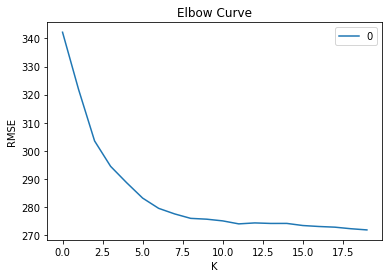

In [57]:
elbow_curve = pd.DataFrame(rmse_val)
elbow_curve.plot()
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('Elbow Curve')

# Hyperparameter tuning with GridSearchCV

In [58]:
grid_params = {'n_neighbors' : [2,3,4,5,6,7,8,9]}
knn = KNeighborsRegressor()
model_best = GridSearchCV(knn, grid_params, cv=5)
model_best.fit(X_train, y_train)
y_pred_knn_best = model_best.predict(X_test)
print(model_best.best_estimator_)

KNeighborsRegressor(n_neighbors=9)


In [59]:
cv_knn_best = cross_val_score(model_best, X_train, y_train, cv=5)
print(cv_knn_best)

[-0.01966048 -0.04335367  0.00095466 -0.18434423 -0.05111994]


In [60]:
np.mean(cv_knn_best), np.std(cv_knn_best)

(-0.05950473200807871, 0.06505223157273421)

In [61]:
r2_score(y_test, y_pred_knn_best)

-0.012786613880408915

In [62]:
mean_absolute_error(y_test, y_pred_knn_best)

111.94575373212236

# Negative MAE Comparison  

In [63]:
lr_neg_mae = cross_val_score(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [64]:
lr_mae_mean = np.mean(-1 * lr_neg_mae)
lr_mae_std = np.std(-1 * lr_neg_mae)
lr_mae_mean, lr_mae_std

(111.94781214474362, 2.465080987797808)

In [65]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

111.5633100716542

In [66]:
rf_neg_mae = cross_val_score(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [67]:
rf_mae_mean = np.mean(-1 * rf_neg_mae)
rf_mae_std = np.std(-1 * rf_neg_mae)
rf_mae_mean, rf_mae_std

(114.63877276731918, 1.8623230556599901)

In [68]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

113.1671713055954

In [69]:
knn_neg_mae = cross_val_score(model_best.best_estimator_, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)

In [70]:
knn_neg_mae_mean = np.mean(-1 * knn_neg_mae)
knn_neg_mae_std = np.std(-1 * knn_neg_mae)
knn_neg_mae_mean, knn_neg_mae_std

(113.32642244593585, 2.1228479800309468)

In [71]:
mean_absolute_error(y_test,model_best.best_estimator_.predict(X_test))

111.94575373212236

# Conclusion

After cross-validating and hyperparameter tuning with grid search CV on all three models, it appears that the best performing model in terms of mean absolute error is the Linear Regression model, as  it had the lowest MAE out of all models (111.5633100716542),  although it had the highest variability in MAE (2.465080987797808) after hyperparameter tuning. The KNN Regression model is the second best performing model, because it had a slightly higher MAE (111.94575373212236) (but still lower than the RF regression model) as well as second lowest variability (2.12284798003094683). The Random Forest Regression model was the worst performing with the highest MAE (113.1671713055954), however it had the lowest variability out of all 3 models (1.8623230556599901). 

The results suggest that the Linear Regression model had the most accuracy of predicting price in in dollar terms. It was more accurate than the KNN Regression model by 0.38 dollars, and more accurate than the RF Regression model by $1.60. Interestingly though, the MAE standard deviation calculations for each model suggest that the Random Forest model will preidct prices with the least variability.

Since the Linear Regression model showed to be the most accurate model to predict listing price, I will proceed with using this model over the KNN Regression or RF Regression Models. 

It is also important to note that the most useful feature revealed by the Linear Regression Model to predict price was the listing avaialibility throughout the year.

In [130]:
import joblib

In [133]:
model = rf_best
filename = 'RF Regression Model for Price Prediction.sav'
joblib.dump(model, filename)

['RF Regression Model for Price Prediction.sav']